# **이변량분석 : 범주 vs 숫자**

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|----|----|----|
|	**survived**	|	생존여부	|	0 - 사망, 1- 생존	|
|	**Pclass**	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	**Sex**	|	성별	|		|
|	**Age**	|	Age in years	|		|
|	**Sibsp**	|	# of siblings / spouses aboard the Titanic	|		|
|	**Parch**	|	# of parents / children aboard the Titanic	|		|
|	**Ticket**	|	Ticket number	|		|
|	**Fare**	|	Passenger fare	|		|
|	**Cabin**	|	Cabin number	|		|
|	**Embarked**	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


범주별 숫자를 비교할 때 사용되는 방식은 **범주별 평균 비교** 입니다.  


## **2.시각화**
titanic data에서 Age를 Y로 두고 비교해 봅시다.

### **(1) 평균 비교 : barplot**

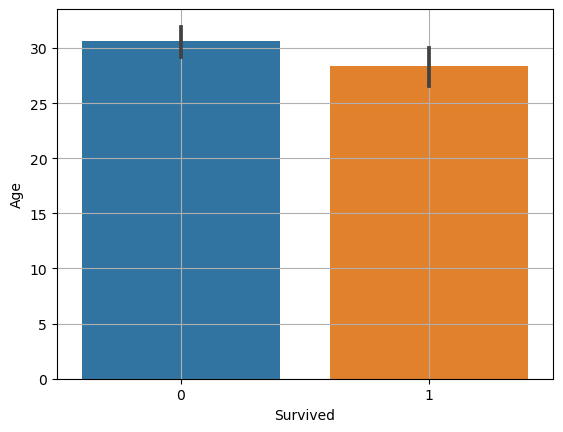

In [3]:
sns.barplot(x="Survived", y="Age", data=titanic)
plt.grid()
plt.show()

In [4]:
titanic.loc[:10, ['Survived','Age']]

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0


위 두 범주간에 평균에 차이가 있나요?

In [ ]:
# 신뢰구간이 겹쳐서 평균이 큰 차이가 없어보임 

### **(2) (추가) boxplot**

In [ ]:
sns.boxplot(x='Survived', y = 'Age', data = titanic)
plt.grid()
plt.show()

## **3.수치화**

### **(1) t-test**

두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다. 
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.
* 주의사항 : 데이터에 NaN이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.
* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다. 
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다. 

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


#### **1) 데이터 준비**

In [5]:
# 먼저 NaN이 있는지 확인해 봅시다.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]

In [7]:
# 두 그룹으로 데이터 저장
died = temp.loc[temp['Survived']==0, 'Age']
survived = temp.loc[temp['Survived']==1, 'Age']

In [30]:
died

0      22.0
4      35.0
6      54.0
7       2.0
12     20.0
       ... 
883    28.0
884    25.0
885    39.0
886    27.0
890    32.0
Name: Age, Length: 424, dtype: float64

#### **2) t-test**

In [8]:
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

In [10]:
spst.ttest_ind(survived, died)

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

In [ ]:
# 두 평균의 차이 임으로 앞에 것이 크면 양수 뒤에가 크면 음수로 나옴 
# 2개의 순서는 상관이 없다!!!! 
# 어차피 절대값으로 비교하며 2/-2 보다 크면 차이가 있다. 

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 성별에 따라 운임에 차이가 있을 것이다.

<Axes: xlabel='Sex', ylabel='Fare'>

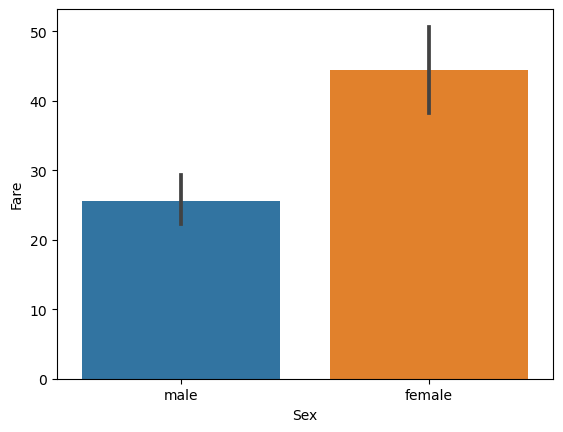

In [14]:
# x가 성별이(범주)고 y가 숫자임으f로
#titanic
sns.barplot(x='Sex', y='Fare', data=titanic)

In [27]:
titanic2= titanic.loc[titanic['Sex'].notnull()]

In [32]:
## *** male인 사람의 요금을 뽑아야함@!!!!!! 
male = titanic2.loc[titanic['Sex']=='male','Fare']
female = titanic2.loc[titanic['Sex']=='female','Fare']

In [33]:
male

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
883    10.5000
884     7.0500
886    13.0000
889    30.0000
890     7.7500
Name: Fare, Length: 577, dtype: float64

In [34]:
spst.ttest_ind(male,female)

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

* [문2] 생존여부에 따라 운임에 차이가 있을 것이다.

<Axes: xlabel='Survived', ylabel='Fare'>

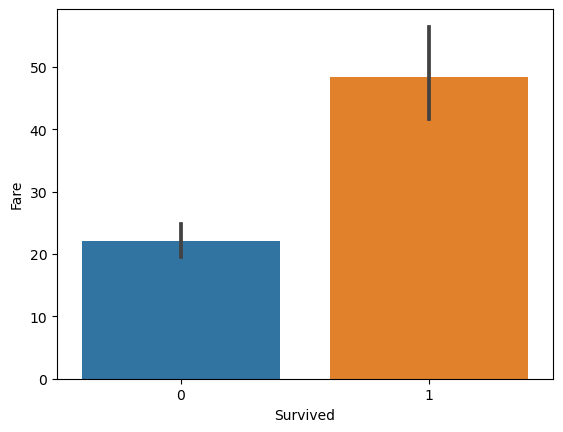

In [35]:
sns.barplot(x='Survived', y='Fare', data=titanic)

In [36]:
sur0 = titanic.loc[titanic['Survived']==0,'Fare']
sur1 = titanic.loc[titanic['Survived']==1,'Fare']
sur1

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64

In [37]:
spst.ttest_ind(sur0, sur1)

Ttest_indResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15)

### **(2) anova**


* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 = 
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.

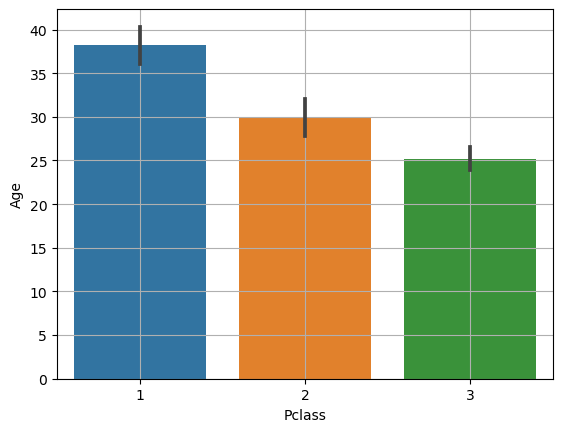

In [38]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

#### **1) 데이터 준비**

In [ ]:
# 1) 분산 분석을 위한 데이터 만들기
# NaN 행 제외 (굳이 할 필요가 없는게 그룹별 저장을 할 때 nan이 자동으로 빠짐)
temp = titanic.loc[titanic['Age'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

#### **2) anova**

In [ ]:
spst.f_oneway(P_1, P_2, P_3)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 승선지역(Embarked)별로 운임에 차이가 있을 것이다. 
    * 시각화와 수치화로 확인해 봅시다.

<Axes: xlabel='Embarked', ylabel='Fare'>

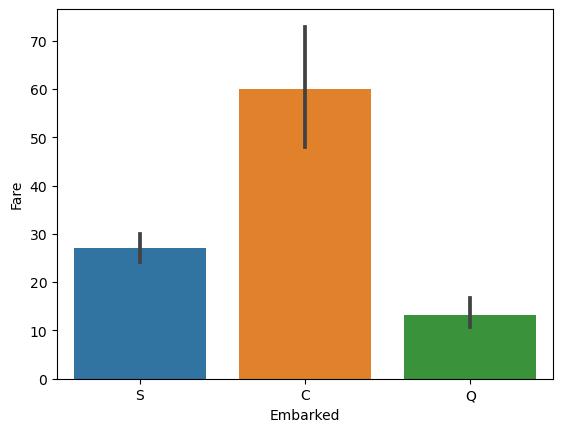

In [39]:
# 이때는 nan을 안빼도 됨 ! 알아서 빼고 그려준다. 
sns.barplot(x='Embarked', y='Fare', data=titanic)

In [43]:
temp = titanic.loc[titanic['Embarked'].notnull()]
temp['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
s = temp.loc[temp.Embarked=='S','Fare']
c = temp.loc[temp.Embarked=='C','Fare']
q = temp.loc[temp.Embarked=='Q','Fare']
s

0       7.2500
2       7.9250
3      53.1000
4       8.0500
6      51.8625
        ...   
883    10.5000
884     7.0500
886    13.0000
887    30.0000
888    23.4500
Name: Fare, Length: 644, dtype: float64

In [45]:
spst.f_oneway(s,c,q)

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)

* [문2] 객실등급(Pclass)별로 운임에 차이가 있을 것이다. 
    * 시각화와 수치화로 확인해 봅시다.

<Axes: xlabel='Pclass', ylabel='Fare'>

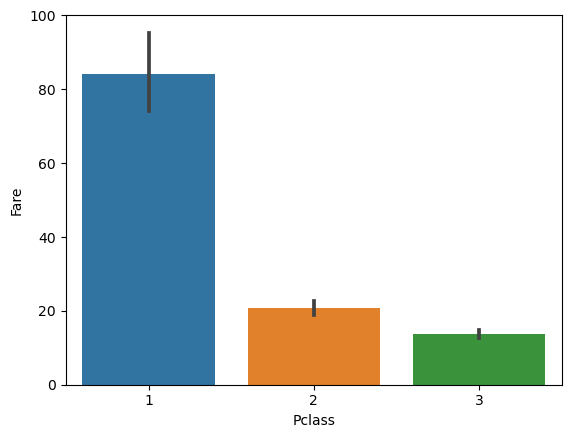

In [46]:
sns.barplot(x='Pclass', y='Fare', data=titanic)

In [47]:
f1 = temp.loc[temp.Pclass==1,'Fare']
f2 = temp.loc[temp.Pclass==2,'Fare']
f3 = temp.loc[temp.Pclass==3,'Fare']

In [48]:
spst.f_oneway(f1,f2,f3)

F_onewayResult(statistic=240.38829529293864, pvalue=3.9731247008614907e-84)

## **4.복습문제**

air quality 데이터셋으로 다음 문제를 풀어 봅시다.

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터불러오기

In [ ]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air['Weekend'] = np.where(air['Weekday'] >=5, 1, 0)
air.head()

* 1) 주말여부(Weekend) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

* 2) 요일(Weekday) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

* 3) 월(Month) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

In [49]:
titanic.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_14368\2964377706.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
